1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

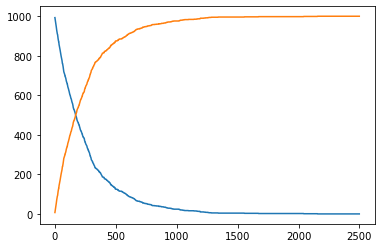

In [24]:
import numpy as np
import matplotlib.pyplot as plt

seconds = 2500

def decay(tau, prob_f, tl_atoms=1000):
    tl_atoms_histoty = []
    
    for second in range(seconds):
        prob = prob_f(second, tau*60)
        decayed_atoms = sum(np.random.uniform(0, 1, tl_atoms) < prob)
        tl_atoms -= decayed_atoms
        tl_atoms_histoty.append(tl_atoms)
    
    return np.array(tl_atoms_histoty)
                  
tl_atoms_histoty_1 = decay(tau=3.052, prob_f=lambda t, tau: 1 - 2**(-1/tau))

plt.plot(tl_atoms_histoty_1)
plt.plot(1000 - tl_atoms_histoty_1)

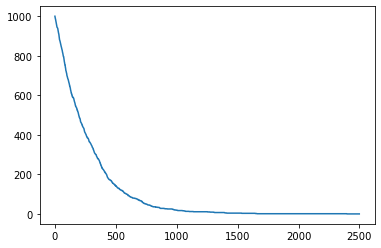

In [30]:
def icdf(x, tau=3.052):
    return -(tau*60) * np.log2(1 - x)

x = np.random.random(1000)
times_delay = icdf(x)

atoms_not_decayed = []
for t in range(2500):
    atoms_not_decayed.append(np.sum(times_delay > t))

plt.plot(atoms_not_decayed)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

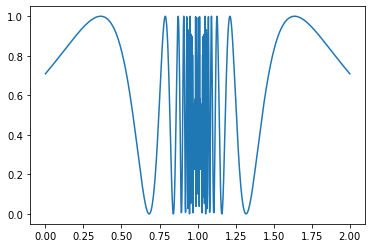

In [3]:
def f(x):
    return np.sin(1. / (1 - x))**2

x = np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x))

In [4]:
def integral_hit_miss(f):
    N = 100000
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): count += 1
    I = 2 * count / N
    
    return I

def error_estimation_hit_miss():
    integrals = []
    for i in range(100):
        integrals.append(integral_hit_miss(f))
    return np.array(integrals)

integrals = error_estimation_hit_miss()

print('Integral mean value:', integrals.mean())
print('Integral std value: ', integrals.std())

Integral mean value: 1.3467923999999996
Integral std value:  0.0027676297151172473


In [5]:
def integral_mean_value(f):
    N = 100000
    x = 2*np.random.random(N)
    return (2 - 0)/N * np.sum(f(x))

def error_estimation_mean_value():
    integrals = []
    for i in range(100):
        integrals.append(integral_mean_value(f))
    return np.array(integrals)

integrals = error_estimation_mean_value()

print('Integral mean value:', integrals.mean())
print('Integral std value: ', integrals.std())

Integral mean value: 1.3472346827120072
Integral std value:  0.0023213566644413558


Std of the integral calculated with the mean value method is a bit lower than the one calculated with the hit/miss method

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [6]:
def f(x):
    if np.sqrt(sum(x**2)) > 1:
        return 0
    else:
        return 1

def integral_high_dim(f, a=-1, b=+1, dim=2):
    N = 100000
    x = (b - a) * np.random.random((dim, N)) + a
    return ((b - a) ** dim) / N * np.sum(np.apply_along_axis(f, axis=0, arr=x))

def error_estimation_high_dim():
    results = []
    for i in range(100):
        results.append(integral_high_dim(f, dim=10))
    results = np.array(results)
    
    return results.mean(), results.std()
    
I = integral_high_dim(f, dim=2)
print('Area of circle:', I, '\n')

I = integral_high_dim(f, dim=10)
print('Volume of sphere 10 dimensions:', I)

mean, std = error_estimation_high_dim()
print('Volume of sphere 10 dimensions (mean):', mean)
print('Volume of sphere 10 dimensions (std):', std)

Area of circle: 3.1357600000000003 

Volume of sphere 10 dimensions: 2.6112
Volume of sphere 10 dimensions (mean): 2.5668608000000006
Volume of sphere 10 dimensions (std): 0.17343461730392815


In [7]:
#Correct volume
np.pi ** 5 / 120

2.550164039877345

4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [19]:
def f(x):
    return x**(-1/2) / (np.e**x + 1)

def w(x):
    return 1 / np.sqrt(x)

n = 10000
x = np.random.random(n) ** 2

def importance_sampling():
    results = []
    for i in range(100):
        result = 2 / n * np.sum(f(x) / w(x))
        results.append(result)
    results = np.array(results)
    
    return results.mean(), results.std()

mean, std = importance_sampling()
print('Intregral (mean):', mean, ' std:', std)

Intregral (mean): 0.8397439796778622  std: 1.1102230246251565e-16
